<a href="https://colab.research.google.com/github/NohMyungWook/study_deep/blob/main/SingleLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

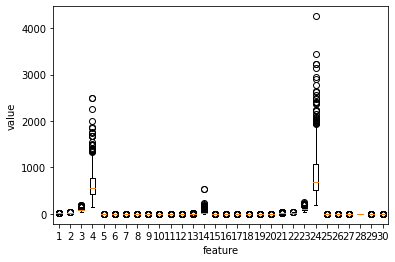

0.8859649122807017


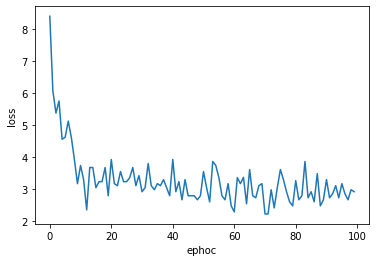

['mean perimeter' 'mean area']


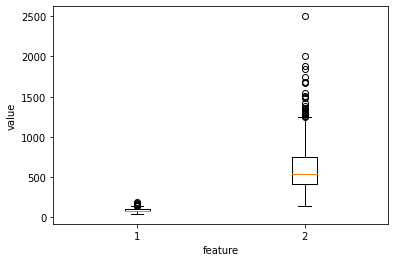

0.9120879120879121


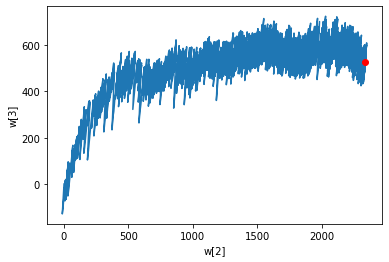

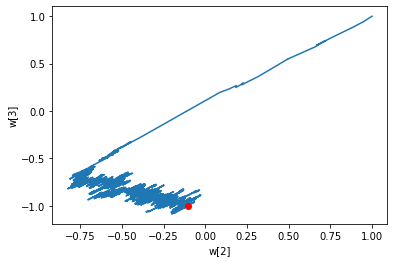

0.37362637362637363
0.967032967032967


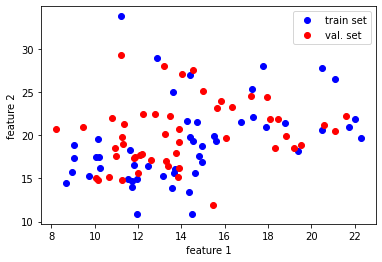

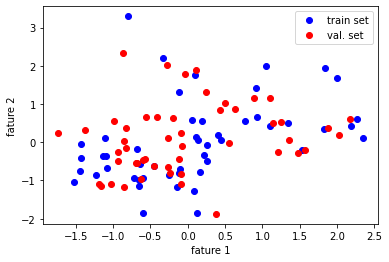

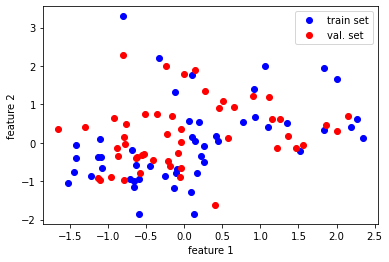

0.967032967032967


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 유방암 데이터
from sklearn.model_selection import train_test_split # 훈련세트 75% 테스트세트 25%비율로 나눈다
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)

cancer = load_breast_cancer()

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
# stratify=y : 훈련 데이터를 나눌 때 클래스 비율을 동일하게
# test_size=0.2 : 훈련세트 80% 테스트세트 20% 비율로 나눈다
# random_state=42 : 무작위로 데이터를 섞는다 (예제와 맞추기 위해 초기 난수 설정)

class SingleLayer:

  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b                   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)                        # 안전한 np,exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))                          # 시그모이드 계산
    return a

  def fit(self, x, y, ephochs=100):
    self.w = np.ones(x.shape[1])                      # 가중치를 초기화합니다.
    self.b = 0                                        # 절편을 초기화합니다.
    self.w_history.append(self.w.copy())              # 가중치를 기록합니다.
    np.random.seed(42)                                # 무작위로 시드를 지정합니다.
    for i in range(ephochs):                          # ephochs만큼 반복합니다.
      loss = 0              
      indexes = np.random.permutation(np.arange(len(x)))    # 인덱스를 섞습니다.
      for i in indexes:                                     # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])                          # 정방향 계산
        a = self.activation(z)                          # 활성화 함수 적용
        err = -(y[i] - a)                               # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)       # 역방향 계산
        self.w -= self.lr * w_grad                      # 가중치 업데이트(학습률 적용)
        self.b -= b_grad                                # 절편 업데이트
        #가중치를 기록합니다.
        self.w_history.append(self.w.copy())
        # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

layer = SingleLayer()
layer.fit(x_train, y_train)
print(layer.score(x_test, y_test))

# ephoch가 진행됨에 따라 손실 함수의 값이 줄어든다.
plt.plot(layer.losses)
plt.xlabel('ephoc')
plt.ylabel('loss')
plt.show()

sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)
sgd.predict(x_test[0:10])

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

layer1 = SingleLayer()
layer1.fit(x_train, y_train)
print(layer1.score(x_val, y_val))
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

train_mean = np.mean(x_train, axis = 0)
train_std = np.std(x_train, axis = 0)
x_train_scaled = (x_train - train_mean) / train_std

layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

print(layer2.score(x_val, y_val))           # 검증 세트 스케일을 바꾸지 않았기 때문에 성능이 좋지 않다.
# 검증 세트 스케일 변경
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
print(layer2.score(x_val_scaled, y_val))

# 원본 산점도
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

# 전처리 산점도
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

# 올바르게 세트 전처리하기
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

print(layer2.score(x_val_scaled, y_val)) 